In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('test3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(512, 680)

In [3]:
segments = []
psi = np.zeros((4,4))
for i in range(0, img.shape[0], 4):
    for j in range(0, img.shape[1], 4):
        segments.append(img[i:i + 4, j:j + 4])
        psi += segments[-1]

psi /= len(segments)
print(len(segments))
print(psi)

phi = []
for i in range(len(segments)):
    phi.append(segments[i] - psi)

21760
[[140.31870404 140.31438419 140.29411765 140.29673713]
 [140.18648897 140.19453125 140.18501838 140.17054228]
 [140.09347426 140.09650735 140.09181985 140.08285846]
 [140.02003676 140.02913603 140.0214614  140.01539522]]


In [4]:
print(phi[0])
print(phi[0].reshape(16,1))

A = np.zeros((16, len(segments)))
for i in range(len(segments)):
    A[:,i] = phi[i].reshape(16)

print(A)

[[65.68129596 66.68561581 56.70588235 44.70326287]
 [71.81351103 71.80546875 59.81498162 43.82945772]
 [78.90652574 73.90349265 62.90818015 47.91714154]
 [84.97996324 76.97086397 65.9785386  52.98460478]]
[[65.68129596]
 [66.68561581]
 [56.70588235]
 [44.70326287]
 [71.81351103]
 [71.80546875]
 [59.81498162]
 [43.82945772]
 [78.90652574]
 [73.90349265]
 [62.90818015]
 [47.91714154]
 [84.97996324]
 [76.97086397]
 [65.9785386 ]
 [52.98460478]]
[[ 65.68129596  37.68129596  51.68129596 ... -32.31870404 -45.31870404
  -56.31870404]
 [ 66.68561581  37.68561581  54.68561581 ... -35.31438419 -50.31438419
  -57.31438419]
 [ 56.70588235  40.70588235  53.70588235 ... -35.29411765 -50.29411765
  -61.29411765]
 ...
 [ 76.97086397  37.97086397  52.97086397 ... -38.02913603 -42.02913603
  -57.02913603]
 [ 65.9785386   36.9785386   58.9785386  ... -36.0214614  -48.0214614
  -61.0214614 ]
 [ 52.98460478  38.98460478  61.98460478 ... -36.01539522 -53.01539522
  -63.01539522]]


In [5]:
w, v = np.linalg.eig(np.matmul(A, A.transpose()))
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

In [6]:
w

array([8.35440353e+08, 1.12455105e+07, 1.02514368e+07, 9.63851491e+05,
       6.36218595e+05, 4.19633219e+05, 1.05211181e+05, 9.80580567e+04,
       3.46501713e+04, 2.52162804e+04, 2.38950564e+04, 1.58030622e+04,
       1.07399140e+04, 8.48340267e+03, 8.21685572e+03, 7.76273202e+03])

In [7]:
v

array([[-2.47381442e-01, -4.52733120e-01, -1.67031176e-02,
         4.72878316e-01, -2.79214570e-01, -3.25974575e-03,
         4.92544597e-01, -1.02806882e-01, -5.86279416e-02,
        -1.20678590e-01, -2.82837534e-01,  2.06548747e-01,
         3.88096962e-03, -1.30029857e-01,  1.21227583e-01,
        -8.07616590e-02],
       [-2.50023762e-01, -3.29676305e-01,  1.47269926e-01,
         1.66777608e-01,  1.52316562e-02, -3.64921375e-01,
        -2.16523501e-01, -2.49319928e-01, -1.71793621e-01,
         3.48590321e-01,  1.96108569e-01, -1.80916876e-01,
        -3.42130168e-01,  1.28909330e-01, -3.96516792e-01,
         1.54084404e-01],
       [-2.50221466e-01, -1.74343386e-01,  3.15587554e-01,
        -1.60320518e-01, -4.18061525e-02, -3.49235449e-01,
        -2.78623598e-01, -8.00747971e-02, -1.70259789e-01,
        -2.73856538e-01,  2.97803077e-01,  2.23385885e-01,
         3.57483783e-01,  8.66314669e-02,  4.26111406e-01,
        -1.20394647e-01],
       [-2.48167060e-01, -1.52715065e

In [8]:
u = []
for i in v:
    u.append(i.reshape((4,4)))
len(u)

16

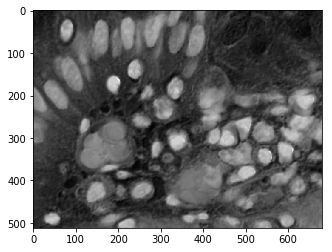

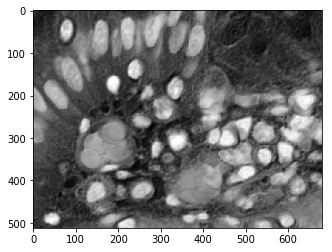

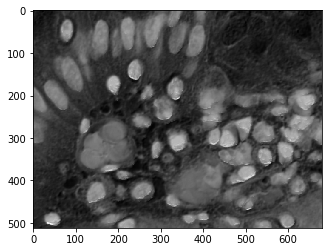

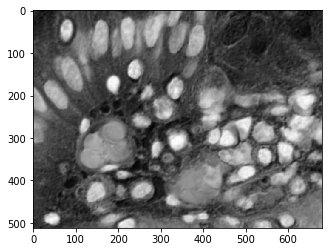

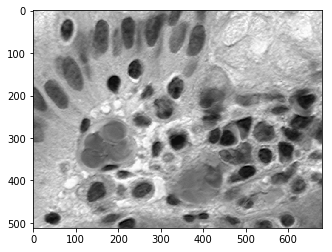

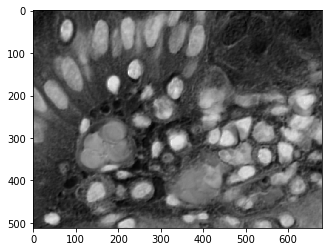

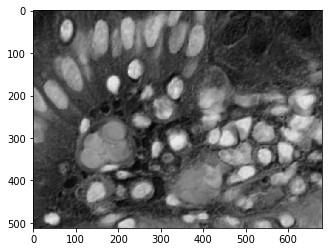

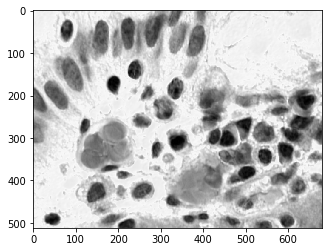

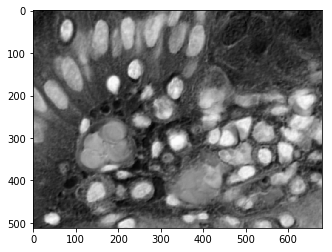

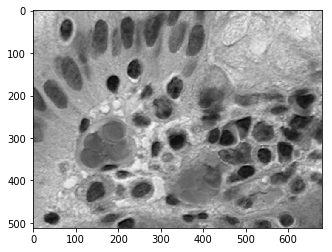

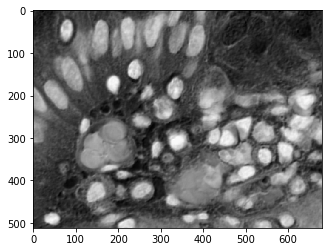

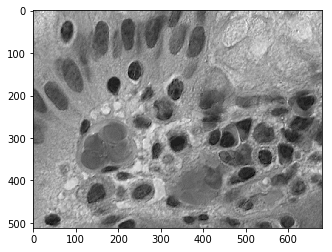

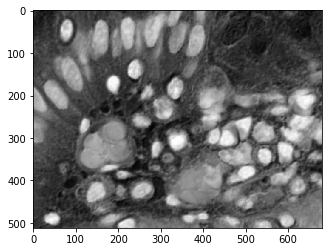

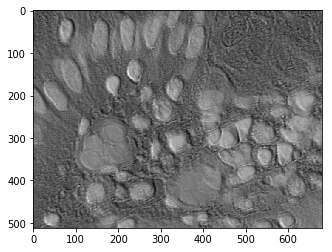

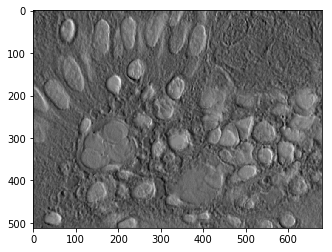

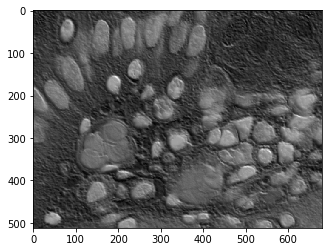

In [9]:
e = []
for i in u:
    e.append(cv2.filter2D(img, -1, i))

psi_e = np.zeros(e[0].shape)
for i in e:
    psi_e += i
    
psi_e /= len(e)

beta = []
for i in e:
    beta.append(i - psi_e)
    
    plt.imshow(beta[-1], cmap='gray')
    plt.show()

In [10]:
beta_prime = []
alpha = beta[0]
for i in range(1, len(beta)):
    # a = np.zeros(beta[i].shape)
    
    #for j in range(beta[i].shape[0]):
    #    for k in range(beta[i].shape[1]):
    #        print(j, k)
    #        print(beta[i][j,k])
    #        a[j,k] = np.max(beta[i][j,k], beta[i - 1][j,k])
    beta_prime.append(np.maximum(beta[i], beta[i - 1]))
    alpha = np.maximum(beta[i], alpha)

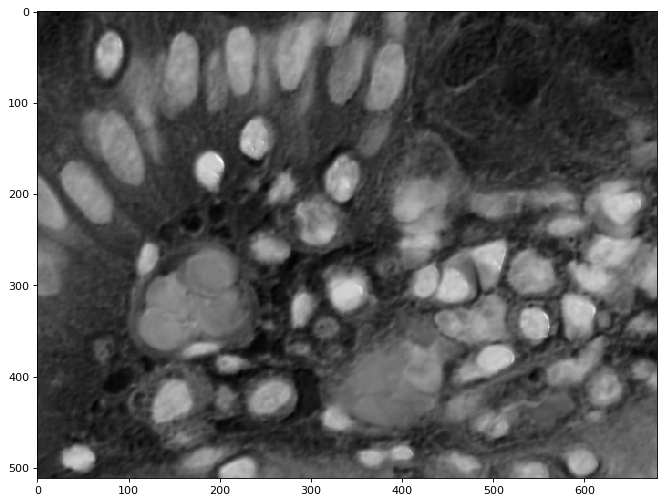

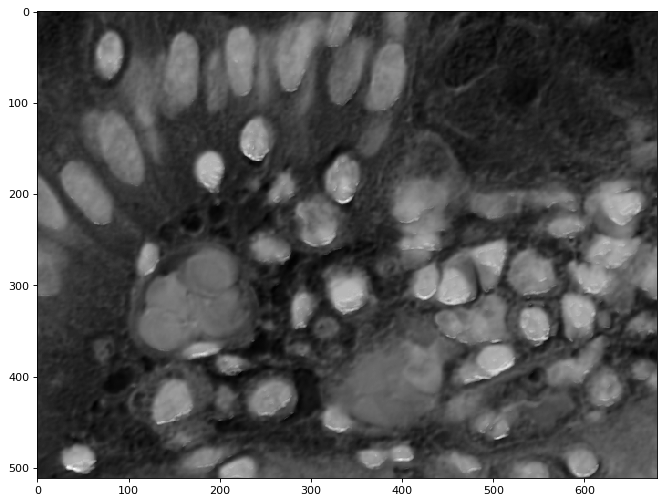

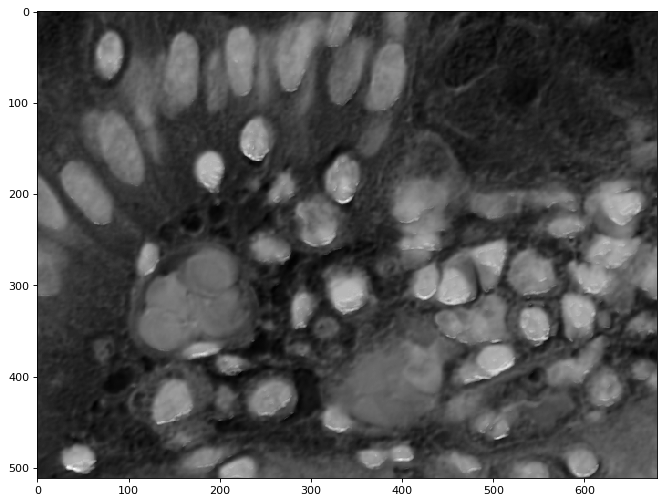

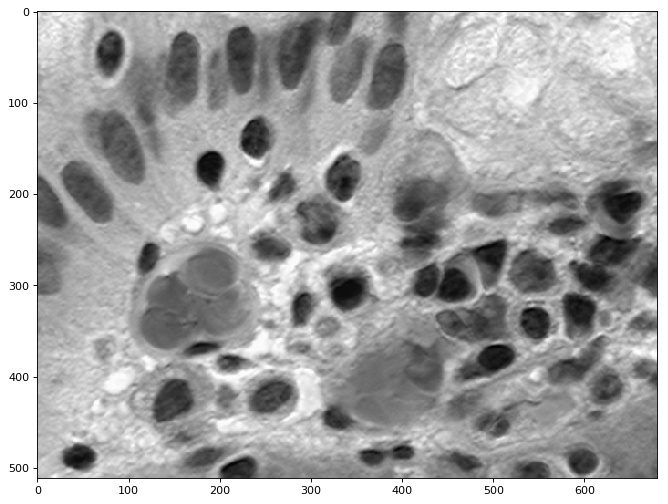

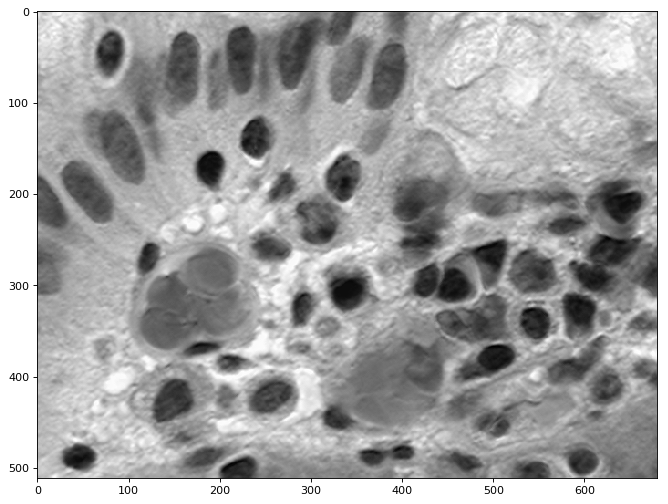

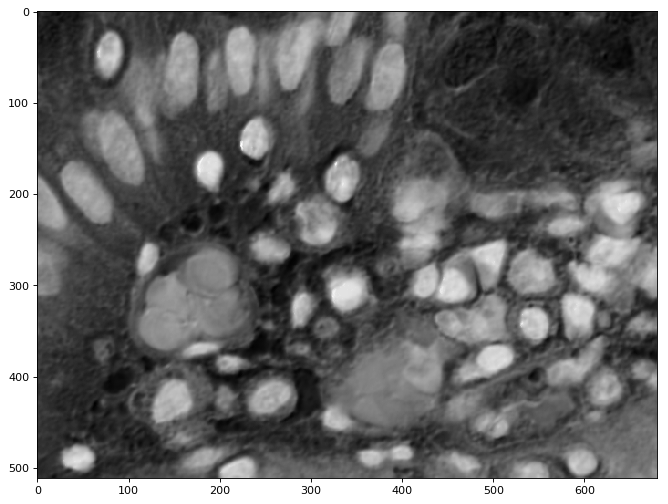

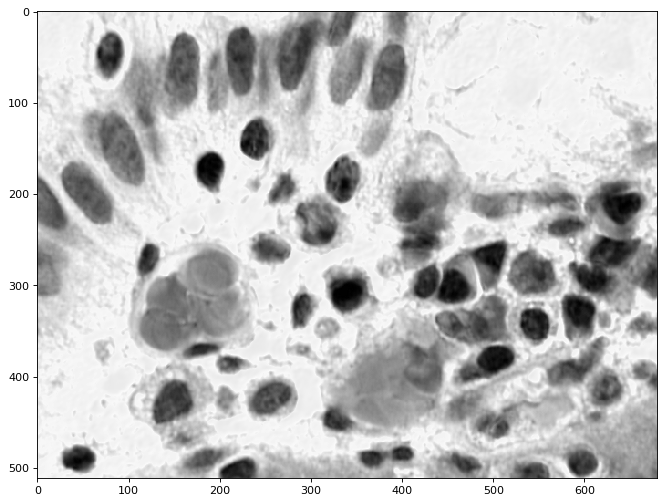

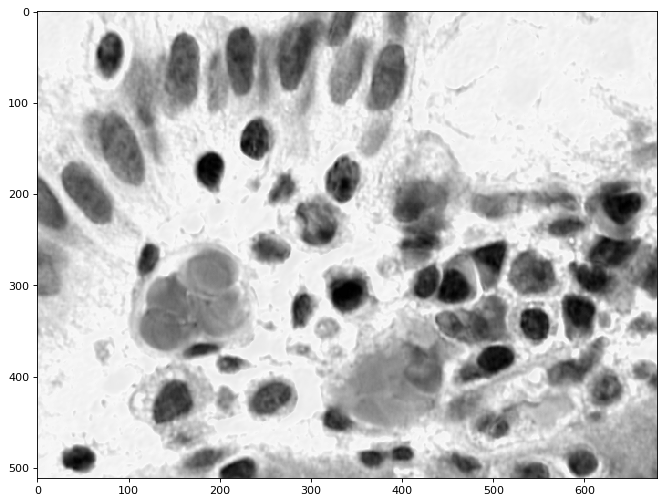

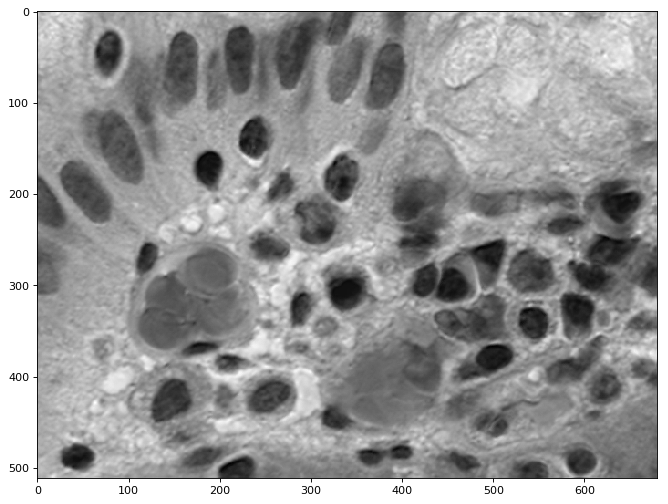

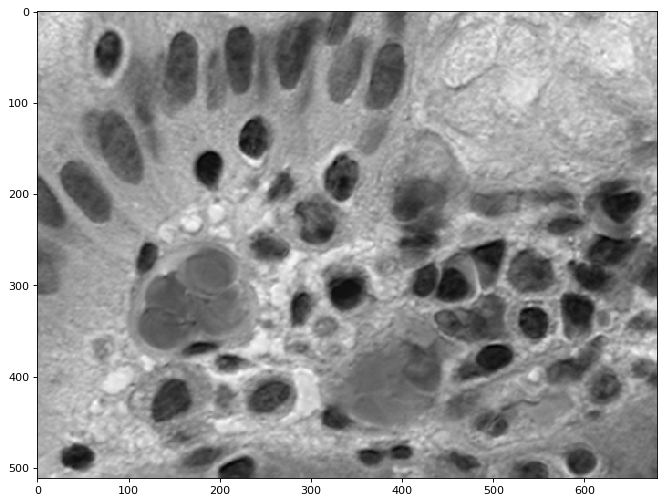

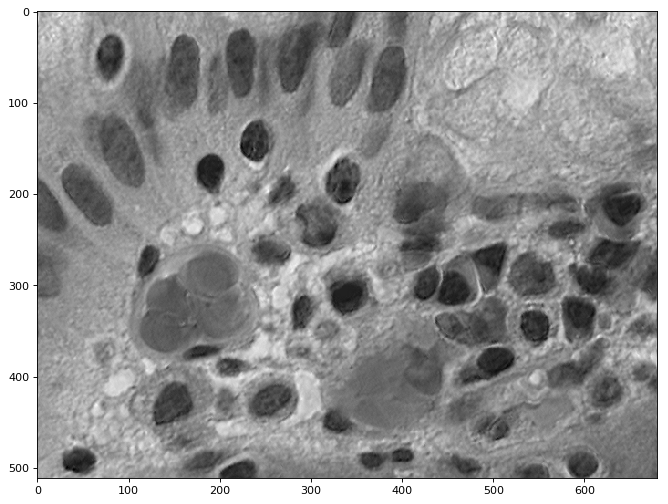

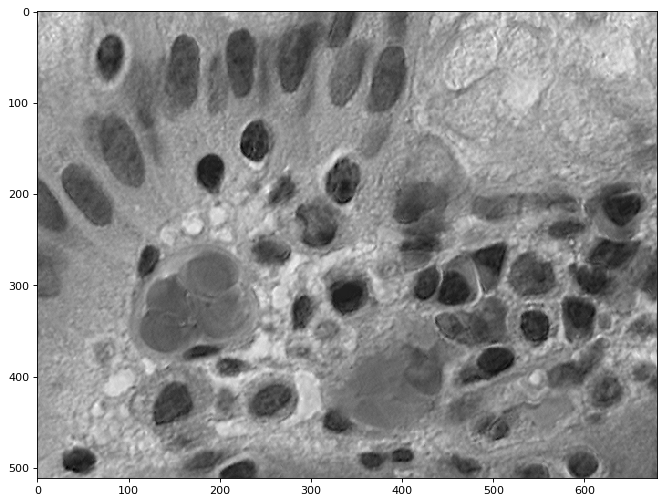

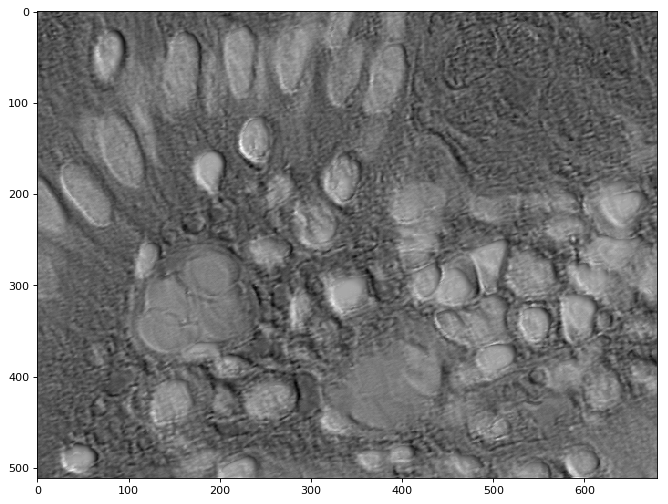

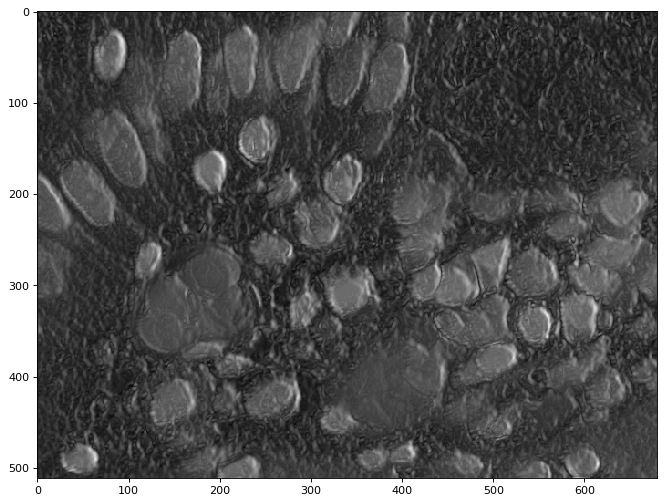

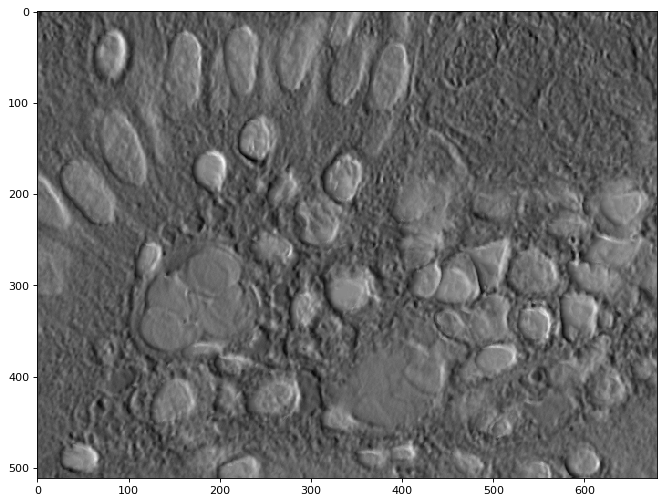

In [11]:
for p in beta_prime:
    fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(p, cmap='gray')
    plt.show()

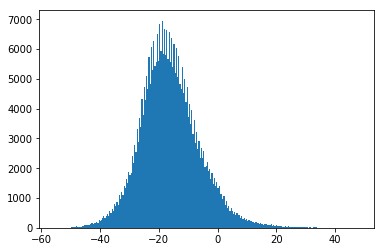

In [12]:
plt.hist(beta_prime[-1].flatten(), bins=256)
plt.show()

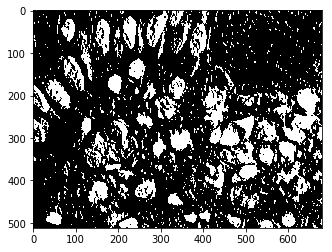

In [13]:
#th = cv2.threshold(beta_prime[-1],0,255,cv2.THRESH_BINARY)
import copy
th = copy.copy(beta_prime[-1])
th[th > -10] = 255
th[th <= -10] = 0
plt.imshow(th, cmap='gray')
plt.show()

In [32]:
import scipy.misc
import random

d = '/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9'

img = cv2.imread(d + '/images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mask = cv2.imread(d + '/sparse_mask.png')
mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]

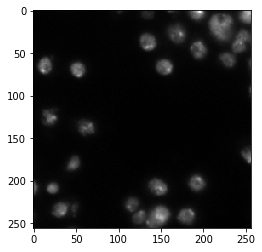

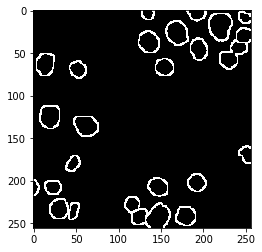

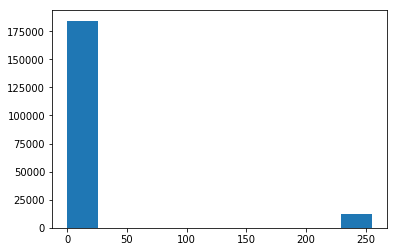

In [30]:
plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

plt.hist(mask.flatten())
plt.show()

In [3]:
import scipy.misc
import random
import os
import numpy as np
import cv2
import math

for o in os.listdir('/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/'):
    if o[0] == '.':
        continue
        
    d = '/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/' + o

    mask = cv2.imread(d + '/sparse_mask.png')
    mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]
    
    PATCH_SIZE = 3
    truth = np.zeros((math.ceil(mask.shape[0] / PATCH_SIZE), math.ceil(mask.shape[1] / PATCH_SIZE)))
    print(mask.shape, mask.shape[0] // PATCH_SIZE, mask.shape[1] // PATCH_SIZE)
    for i in range(0, mask.shape[0], PATCH_SIZE):
        for j in range(0, mask.shape[1], PATCH_SIZE):
            val = int(bool(np.sum(mask[i:i + PATCH_SIZE, j:j + PATCH_SIZE])))
            truth[i // PATCH_SIZE, j // PATCH_SIZE] = val
    np.save(d + '/truth_' + str(PATCH_SIZE), truth)
    print("Done with", o)

(256, 256, 3) 85 85
Done with fc345dac2205deb169bd70197f07f053bada80b61ffa69fdfb490758323ead69
(256, 256, 3) 85 85
Done with c53326fe49fc26b7fe602b9d8c0c2da2cb157690b44c2b9351a93f8d9bd8043d
(256, 256, 3) 85 85
Done with 8175a55b711c948fe383bd3b91b6ca1b9e048a5241e0be13aff31ce2674fbe6d
(1024, 1024, 3) 341 341
Done with 54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12
(256, 320, 3) 85 106
Done with 853a4c67900c411abd04467f7bc7813d3c58a5f565c8b0807e13c6e6dea21344
(256, 256, 3) 85 85
Done with b0d6dfcc95e4d087d232378f860fc3ef9f95ea5a4c26d623a0be091f820a793f
(256, 256, 3) 85 85
Done with bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66
(256, 320, 3) 85 106
Done with 4d14a3629b6af6de86d850be236b833a7bfcbf6d8665fd73c6dc339e06c14607
(360, 360, 3) 120 120
Done with 797945873ca2a95f028671714b71eb3f883efe9dae7fcd3fc0ea1521efb73aaa
(256, 256, 3) 85 85
Done with 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e
(360, 360, 3) 120 120
Done with a177773727

Done with 2246874c8b5ba218d01ad8153a201ad4660195f3e4c65da6b9d4ccaf82cb7edf
(256, 320, 3) 85 106
Done with 7f34dfccd1bc2e2466ee3d6f74ff05821a0e5404e9cf2c9568da26b59f7afda5
(256, 256, 3) 85 85
Done with cab4875269f44a701c5e58190a1d2f6fcb577ea79d842522dcab20ccb39b7ad2
(256, 256, 3) 85 85
Done with e5aeb5b3577abbebe8982b5dd7d22c4257250ad3000661a42f38bf9248d291fd
(256, 320, 3) 85 106
Done with ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9e0a523484e7cf2258d
(1024, 1024, 3) 341 341
Done with 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812
(256, 256, 3) 85 85
Done with a6593632dcbbe4c9e9429a9cec573d26fd8c91a47d554d315f25e7c2e0280ee3
(256, 256, 3) 85 85
Done with 66612c188d73e931e1863af2c99d2af782c32f65fd97d224abb40bbadb87263f
(256, 256, 3) 85 85
Done with 05a8f65ebd0b30d3b210f30b4d640c847c2e710d0d135e0aeeaccbe1988e3b6e
(256, 256, 3) 85 85
Done with 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9
(520, 696, 3) 173 232
Done with a65bbfc5673e8053b6ce49f39c79cf3a

Done with a5e695fce80dc03efb6665a9ec14500ab47f4ee9f6437531388dd3cc32c90db1
(256, 256, 3) 85 85
Done with aa83f5b4fca02ae43a6b9456ab42707b0beabc6e7c5c4e66c0d2572fb80f3615
(256, 256, 3) 85 85
Done with 03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776
(256, 256, 3) 85 85
Done with 52a4ac5a875be7a6c886035d54fb63f5f397dc43508c4831898f6b2f8debc7f3
(256, 256, 3) 85 85
Done with b7a86f4968071e0f963fa87ef314fdd1b6c73a66355431cc53a37e193ba6be9b
(256, 256, 3) 85 85
Done with a815a986800a95de0957116c6585deea8ffb6ee09ad00ccc687306937ac698d0
(520, 696, 3) 173 232
Done with bde3727f3a9e8b2b58f383ebc762b2157eb50cdbff23e69b025418b43967556b
(256, 256, 3) 85 85
Done with 4a424e0cb845cf6fd4d9fe62875552c7b89a4e0276cf16ebf46babe4656a794e
(256, 256, 3) 85 85
Done with 21408476af0506331e8b5d49b385833e5ef1fbb90815fbf9af9d19b4bb145f76
(256, 256, 3) 85 85
Done with 7aae06bc4558829473071defec0b7ab3bfa9c5005548a13da95596bb6a66d105
(520, 696, 3) 173 232
Done with 53ad09e4348767bece0165884bf40c10b72a

Done with a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288
(520, 696, 3) 173 232
Done with 62057502c387145ed4f8f7f0d5e5bedcb72d3bcec15fa71cb0310dee32871461
(512, 640, 3) 170 213
Done with 9520aff4efe87bd8f3901652fa2dde9b4bc9c679325966145ce00c1ca33f35de
(360, 360, 3) 120 120
Done with 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a
(256, 256, 3) 85 85
Done with edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8
(256, 256, 3) 85 85
Done with 23830d0e51245fc0c9e410efa4c17d2a7d83a0104a3777130119ab892de47a4e
(256, 256, 3) 85 85
Done with fd8065bcb1afdbed19e028465d5d00cd2ecadc4558de05c6fa28bea3c817aa22
(256, 320, 3) 85 106
Done with 45f059cf21d85ecfce0eb93260516f1e2443d210e9a52f9ae2271d604aa3fcc5
(256, 256, 3) 85 85
Done with 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0
(520, 696, 3) 173 232
Done with da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844
(256, 256, 3) 85 85
Done with 4bf6a5ec42032bb8dbbb10d25fdc521

Done with 700afb1cd830a808e3c6125749612e5d23fd9f9726049a9e0c2061997514e1a7
(520, 696, 3) 173 232
Done with 43cf6b2ec0b0745ac2b87b4d8780f62e9050d3f5d50a1fcefa42d166191e84c6
(360, 360, 3) 120 120
Done with 97126a9791f0c1176e4563ad679a301dac27c59011f579e808bbd6e9f4cd1034
(256, 320, 3) 85 106
Done with 9ebcfaf2322932d464f15b5662cae4d669b2d785b8299556d73fffcae8365d32
(256, 256, 3) 85 85
Done with db45946a4412a2137674ec075b6892ccd682b77826aba618210569bbc65cf2b0
(256, 256, 3) 85 85
Done with 37ed50eea5a1e0bade3e6753793b6caeb061cd4c2f365658c257f69cab1f6288
(256, 320, 3) 85 106
Done with ae570a676961482848b5097038ef5e407df7a66a8e1c9b0567da599565a6b142
(360, 360, 3) 120 120
Done with 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365
(1024, 1024, 3) 341 341
Done with 8f94a80b95a881d0efdec36affc915dca9609f4cba8134c4a91b219d418778aa
(256, 256, 3) 85 85
Done with a6001531274f9ad16e0ced40380f9667b9149558dea7053f7a7db18f5cd028c0
(256, 256, 3) 85 85
Done with d1ba6089cae2f90cb7275ece10ca

Done with cfabf7379c5591d40aa4a20c86b4197c6a25ab55887a9fca4f06c2dfc0f0e973
(520, 696, 3) 173 232
Done with 3477024fd843e46097840360f9cdee24b76bf5c593ed27a9aee7a5728a06aa51
(256, 320, 3) 85 106
Done with 1631352dbafb8a90f11219fffd3bea368a30bc3bad3bbe0e84e19bd720df4945
(520, 696, 3) 173 232
Done with fe80a2cf3c93dafad8c364fdd1646b0ba4db056cdb7bdb81474f957064812bba
(256, 256, 3) 85 85
Done with e9b8ad127f2163438b6236c74938f43d7b4863aaf39a16367f4af59bfd96597b
(520, 696, 3) 173 232
Done with ecb36c90cdd20245d89173c106f3c6a2d124d07bdea0ae202fb1efa49b0cd169
(520, 696, 3) 173 232
Done with 150b0ffa318c87b31d78af0e87d60390dbcd84b5f228a8c1fb3225cbe5df3e3f
(520, 696, 3) 173 232
Done with 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5
(512, 640, 3) 170 213
Done with 1400420310c9094361a8a243545187f1d4c2365e081b3bb08c5fa29c7491a55b
(256, 256, 3) 85 85
Done with 619429303c1af7540916509fe7900cf483eba4391b06aac87ff7f66ca1ab6483
(256, 256, 3) 85 85
Done with e4fc936ba57a936aaa5941ccc70

Done with b3a9f4c9035a0df7e033b18c63bfb0f0d87ff5a4d9aa8bdf417159bb733abb80
(360, 360, 3) 120 120
Done with f6cb37ebf29c225284c8415962f7287abe7007fae8fe3d8a3899b608b832d7d5
(1024, 1024, 3) 341 341
Done with 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e
(360, 360, 3) 120 120
Done with c9f305be17312bdb9530fb4f1adc6d29730ddbe0e74730cbf031de174bf437b7
(256, 256, 3) 85 85
Done with d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28
(256, 256, 3) 85 85
Done with 8fdc34509a0c3721f7b5e235c8a93e1f553343aa17ad103a1e89e3509a3e1570
(256, 256, 3) 85 85
Done with 8d9b4205ddb10fa49a2973b4f3a2dc6923407ae015081e1a52c4b4c2fe8faa53
(520, 696, 3) 173 232
Done with 10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28
(256, 256, 3) 85 85
Done with 57d88f45e479ce3821839b2706d667758c63ac769d76800d815c73d2507c1e42
(360, 360, 3) 120 120
Done with 6bc8cda54f5b66a2a27d962ac219f8075bf7cc43b87ba0c9e776404370429e80
(256, 256, 3) 85 85
Done with 93cfd412c7de5210bbd262ec3a60

Done with a90cad45551d62c5cfa89517df8eb5e8f2f87f1a6e6678e606907afcbad91731
(256, 256, 3) 85 85
Done with 4829177d0b36abdd92c4ef0c7834cbc49f95232076bdd7e828f1f7cbb5ed80ec
(520, 696, 3) 173 232
Done with b24ea5c268469a95ed155eeaf809e36030b78a2eb530a0cb2380cdc1ccdb7dd1
(256, 320, 3) 85 106
Done with cbff60361ded0570e5d50429a1aa51d81471819bc9b38359f03cfef76de0038c
(520, 696, 3) 173 232
Done with b1f23c4d27afed8af7b6b64793a3760bfea31b65f582d48aaa62d2b988ef2eac
(256, 256, 3) 85 85
Done with ce37f6dd0615d45e66e41a8f2ed6fbc0bbe3103a290394ad474207507710eacc
(256, 256, 3) 85 85
Done with f487cc82271cf84b4414552aa8b0a9d82d902451ebe8e8bc639d4121c1672ff7
(360, 360, 3) 120 120
Done with a6e81120d1cb9f71f8a25f90a5d56c4b714a642fc496a705e38921fd90a3f69c
(256, 256, 3) 85 85
Done with 29780b28e6a75fac7b96f164a1580666513199794f1b19a5df8587fe0cb59b67
(360, 360, 3) 120 120
Done with 1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d
(1024, 1024, 3) 341 341
Done with 091944f1d2611c916b98c020bd0

In [73]:
import sys

np.set_printoptions(threshold=sys.maxsize)
d = '/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/' + os.listdir('/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/')[0]

print(np.load(d + '/truth.npy'))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

PATCH_SIZE = 3

model = Sequential()
model.add(Dense(PATCH_SIZE * PATCH_SIZE * 3 * 2, activation='relu', input_dim=PATCH_SIZE * PATCH_SIZE * 3))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#sgd = optimizers.SGD(lr=0.003, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
import os
import numpy as np
import cv2
import pandas as pd

import scipy.misc
import random

df = pd.read_csv('0.csv')

data = []
labels = []

#for o in os.listdir('/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/'):
for idx, row in df.loc[:30].iterrows():
    o = row['image_id']
    if o[0] == '.':
        continue
        
    d = '/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/' + o
    
    img = cv2.imread(d + '/images/' + o + '.png')
    if PATCH_SIZE == 1:
        mask = cv2.imread(d + '/sparse_mask.png', 0)
    else:
        truth = np.load(d + '/truth_' + str(PATCH_SIZE) + '.npy')
    
    for i in range(0, img.shape[0], PATCH_SIZE):
        for j in range(0, img.shape[1], PATCH_SIZE):
            if img[i:i + PATCH_SIZE, j:j + PATCH_SIZE].shape == (PATCH_SIZE, PATCH_SIZE, 3):
                data.append(img[i:i + PATCH_SIZE, j:j + PATCH_SIZE].reshape(PATCH_SIZE * PATCH_SIZE * 3))
                if PATCH_SIZE > 1:
                    labels.append(truth[i // PATCH_SIZE,j // PATCH_SIZE])
                else:
                    labels.append(int(mask[i,j] == 255))
data = np.array(data)
data.shape

(484128, 27)

In [98]:
model.fit(data, labels, epochs=1, batch_size=32)

Epoch 1/1
484128/484128 [==============================] - 40s 83us/step - loss: 0.1867 - acc: 0.9321


In [118]:
test = cv2.imread('test2.png')
#test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

x = []

for i in range(0, test.shape[0], PATCH_SIZE):
    for j in range(0, test.shape[1], PATCH_SIZE):
        if test[i:i + PATCH_SIZE, j:j + PATCH_SIZE].shape == (PATCH_SIZE, PATCH_SIZE, 3):
            x.append(test[i:i + PATCH_SIZE, j:j + PATCH_SIZE].reshape(PATCH_SIZE * PATCH_SIZE * 3))
x = np.array(x)

In [119]:
y = model.predict(x)
y

array([[0.02417148],
       [0.03154794],
       [0.04087681],
       [0.04087681],
       [0.03119139],
       [0.03515434],
       [0.04087681],
       [0.04087681],
       [0.04087681],
       [0.04087681],
       [0.04087681],
       [0.03509902],
       [0.0295818 ],
       [0.04087681],
       [0.02044484],
       [0.04087681],
       [0.02285661],
       [0.04087681],
       [0.01699089],
       [0.04087681],
       [0.04087681],
       [0.04087681],
       [0.04087681],
       [0.03787652],
       [0.04087681],
       [0.04087681],
       [0.03001884],
       [0.02952953],
       [0.03997119],
       [0.4882913 ],
       [0.95476365],
       [0.92385757],
       [0.24997896],
       [0.04087681],
       [0.02523583],
       [0.02285955],
       [0.0405218 ],
       [0.04087681],
       [0.04087681],
       [0.03579824],
       [0.02218921],
       [0.02355427],
       [0.04616393],
       [0.04087681],
       [0.06982685],
       [0.04087681],
       [0.04087681],
       [0.028

In [120]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y[y < 0.5] = 0
y[y >= 0.5] = 1

In [121]:
y = y.reshape(test.shape[0] // PATCH_SIZE, test.shape[1] // PATCH_SIZE)
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
      

In [122]:
output = np.zeros(test.shape)
for i in range(0, test.shape[0] // 3 * 3, PATCH_SIZE):
    for j in range(0, test.shape[1] // 3 * 3, PATCH_SIZE):
        pix = y[i // PATCH_SIZE, j // PATCH_SIZE] * 255
        output[i:i + PATCH_SIZE, j:j + PATCH_SIZE] = pix
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


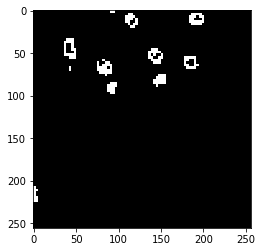

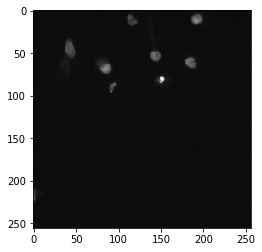

In [123]:
import matplotlib.pyplot as plt

plt.imshow(output, cmap='gray')
plt.show()

plt.imshow(test, cmap='gray')
plt.show()

uint8


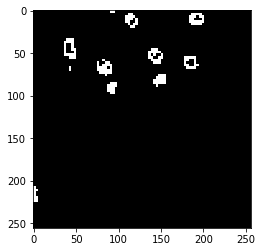

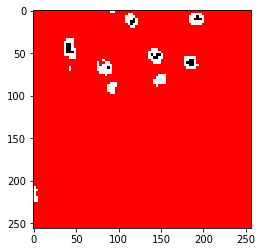

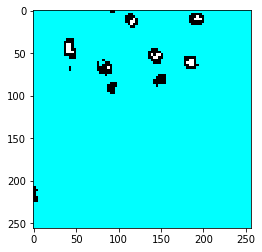

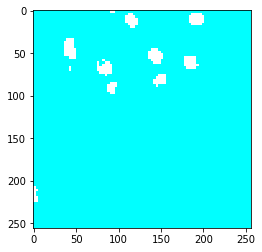

In [124]:
# Copy the thresholded image.
output = output.astype(np.uint8)
im_floodfill = output.copy()
print(im_floodfill.dtype)
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = output.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = output | im_floodfill_inv
 
# Display images.
plt.imshow(output)
plt.show()
plt.imshow(im_floodfill, cmap='gray')
plt.show()
plt.imshow(im_floodfill_inv, cmap='gray')
plt.show()
plt.imshow(im_out)
plt.show()

# Attempting using strident patches

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

PATCH_SIZE = 5
CHANNELS = 3

model = Sequential()
model.add(Dense(PATCH_SIZE * PATCH_SIZE * CHANNELS * 2, activation='relu', input_dim=PATCH_SIZE * PATCH_SIZE * CHANNELS))
model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#sgd = optimizers.SGD(lr=0.003, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
import random

df = pd.read_csv('0.csv')

data = []
labels = []

yes = 0
no = 0
#for o in os.listdir('/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/'):
for idx, row in df.loc[:30].iterrows():
    o = row['image_id']
    if o[0] == '.':
        continue
        
    d = '/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/' + o
    
    img = cv2.imread(d + '/images/' + o + '.png')
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #print(img.shape)
    padding = (PATCH_SIZE // 2, PATCH_SIZE // 2)
    if CHANNELS == 3:
        img_pad = np.pad(img, (padding, padding, (0, 0)), 'constant', constant_values=(0, 0))
    else:
        img_pad = np.pad(img, (padding, padding), 'constant', constant_values=(0, 0))
    #print(img_pad.shape)
    mask = cv2.imread(d + '/sparse_mask.png', 0)
    mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]
    #plt.hist(mask.flatten())
    #plt.show()
    #print(img_pad.shape, img_pad.shape[0] - PATCH_SIZE)
    #print(mask.shape)
    #print(padding)
    for i in range(0, img_pad.shape[0] - PATCH_SIZE - 1):
        for j in range(0, img_pad.shape[1] - PATCH_SIZE - 1):
            if mask[i +  padding[0], j + padding[1]] == 255:
                data.append(img_pad[i:i + PATCH_SIZE, j:j + PATCH_SIZE].reshape(PATCH_SIZE * PATCH_SIZE * CHANNELS))
                labels.append(1)
                yes += 1
            elif random.randint(1, 16) % 16 == 0:
            #elif random.randint(1, 11) % 11 == 0:
                data.append(img_pad[i:i + PATCH_SIZE, j:j + PATCH_SIZE].reshape(PATCH_SIZE * PATCH_SIZE * CHANNELS))
                labels.append(0)
                no += 1
data = np.array(data)
data.shape
print(yes, no, yes / no)

248621 254781 0.9758223729398974


In [7]:
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
503402/503402 [==============================] - 38s 75us/step - loss: 0.4222 - acc: 0.8438
Epoch 2/10
503402/503402 [==============================] - 37s 74us/step - loss: 0.3504 - acc: 0.8691
Epoch 3/10
503402/503402 [==============================] - 37s 73us/step - loss: 0.3392 - acc: 0.8755
Epoch 4/10
503402/503402 [==============================] - 37s 74us/step - loss: 0.3336 - acc: 0.8771
Epoch 5/10
503402/503402 [==============================] - 37s 73us/step - loss: 0.3318 - acc: 0.8790
Epoch 6/10
503402/503402 [==============================] - 37s 74us/step - loss: 0.3301 - acc: 0.8791
Epoch 7/10
503402/503402 [==============================] - 37s 73us/step - loss: 0.3284 - acc: 0.8793
Epoch 8/10
503402/503402 [==============================] - 37s 73us/step - loss: 0.3284 - acc: 0.8797
Epoch 9/10
503402/503402 [==============================] - 37s 73us/step - loss: 0.3257 - acc: 0.8810
Epoch 10/10
503402/503402 [==============================] - 38s 75us/ste

In [18]:
test = cv2.imread('test4.png')
#test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

if CHANNELS == 3:
    test_pad = np.pad(test, (padding, padding, (0, 0)), 'constant', constant_values=(0, 0))
else:
    test_pad = np.pad(test, (padding, padding), 'constant', constant_values=(0, 0))
x = []

for i in range(0, test_pad.shape[0] - PATCH_SIZE):
        for j in range(0, test_pad.shape[1] - PATCH_SIZE):
            x.append(test_pad[i:i + PATCH_SIZE, j:j + PATCH_SIZE].reshape(PATCH_SIZE * PATCH_SIZE * CHANNELS))
x = np.array(x)

In [19]:
y = model.predict(x)
import sys

np.set_printoptions(threshold=sys.maxsize)
print(y.shape)
#y

(1046529, 1)


In [20]:
THRESHOLD = 0.9
y[y < THRESHOLD] = 0
y[y >= THRESHOLD] = 1
y = y.reshape(test.shape[0] - 1, test.shape[1] - 1)

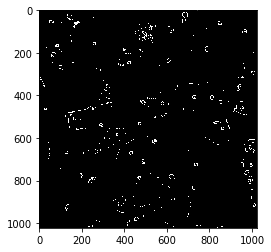

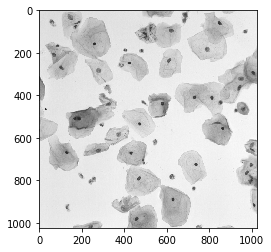

In [21]:
plt.imshow(y, cmap='gray')
plt.show()

plt.imshow(test, cmap='gray')
plt.show()

#plt.imshow(cv2.equalizeHist(test), cmap='gray')
#plt.show()

uint8


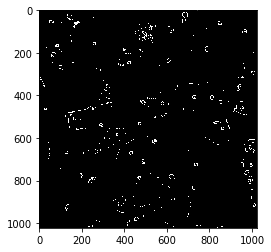

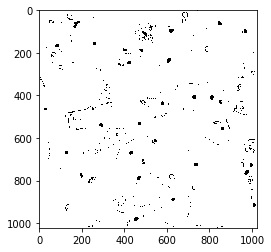

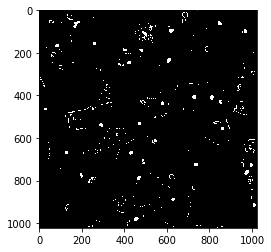

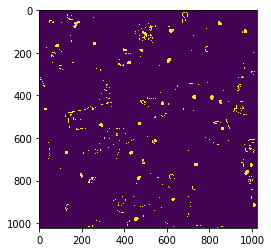

In [22]:
# Copy the thresholded image.
y = y.astype(np.uint8)
im_floodfill = y.copy()
print(im_floodfill.dtype)
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = y.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = y | im_floodfill_inv
 
# Display images.
plt.imshow(y, cmap='gray')
plt.show()
plt.imshow(im_floodfill, cmap='gray')
plt.show()
plt.imshow(im_floodfill_inv, cmap='gray')
plt.show()
plt.imshow(im_out)
plt.show()

# Thin Edges

In [12]:
import os
import glob 
import cv2
import numpy as np
import sys
import scipy.misc
import queue
import threading
import matplotlib.pyplot as plt

directions = [(0, 1), (0, -1), (-1, 0), (1, 0)]
count = 0
dirs = next(os.walk('/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/'))[1]
for d in dirs:
    subdirs = glob.glob("/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/"+d+"/masks/*.png")
    
    output = np.zeros(cv2.imread(subdirs[0], 0).shape)
    for s in subdirs:
        img = cv2.imread(s, 0)
        #plt.imshow(img, cmap='gray')
        #plt.show()
        thin = np.zeros(img.shape)
        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] == 0:
                    continue
                    
                for direction in directions:
                    if i + direction[0] < 0:
                        continue
                    if i + direction[0] >= img.shape[0]:
                        continue
                    if j + direction[1] < 0:
                        continue
                    if j + direction[1] >= img.shape[1]:
                        continue
                    if img[i + direction[0], j + direction[1]] == 0:
                        thin[i, j] = 255
                        break
        output = np.maximum(output, thin)
    scipy.misc.imsave("/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/"+d+"/thin_mask.png", output)
    count += 1
    print(count, "/", len(dirs), d)

/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


1 / 670 fc345dac2205deb169bd70197f07f053bada80b61ffa69fdfb490758323ead69
2 / 670 c53326fe49fc26b7fe602b9d8c0c2da2cb157690b44c2b9351a93f8d9bd8043d
3 / 670 8175a55b711c948fe383bd3b91b6ca1b9e048a5241e0be13aff31ce2674fbe6d
4 / 670 54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12
5 / 670 853a4c67900c411abd04467f7bc7813d3c58a5f565c8b0807e13c6e6dea21344
6 / 670 b0d6dfcc95e4d087d232378f860fc3ef9f95ea5a4c26d623a0be091f820a793f
7 / 670 bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66
8 / 670 4d14a3629b6af6de86d850be236b833a7bfcbf6d8665fd73c6dc339e06c14607
9 / 670 797945873ca2a95f028671714b71eb3f883efe9dae7fcd3fc0ea1521efb73aaa
10 / 670 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e
11 / 670 a1777737270c5f96c4523dff76e4097756f8f7d4c9d59bac079e31f9510deabd
12 / 670 4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a
13 / 670 ed5be4b63e9506ad64660dd92a098ffcc0325195298c13c815a73773f1efc279
14 / 670 0bda515e370294ed94efd36bd53782288acacb

112 / 670 b98681c74842c4058bd2f88b06063731c26a90da083b1ef348e0ec734c58752b
113 / 670 35ca5f142a7d7a3e4b59f1a767a31f87cb00d66348226bc64094ee3d1e46531c
114 / 670 a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d50316673b2b8f1f293b
115 / 670 f4c4db3df4ff0de90f44b027fc2e28c16bf7e5c75ea75b0a9762bbb7ac86e7a3
116 / 670 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
117 / 670 9d429167633b4d9d7f41544a461975cf8e688a3affa6a8916799202874809f2a
118 / 670 33618678c167c5e07be02c49d0c43bcd90493ba5d83110a631409a4d3ccc1e51
119 / 670 98a463483fe3a56deacc8bc00ab8aa62668bd40ad0c70bbe7deb10d3e4aeb0c0
120 / 670 12f89395ad5d21491ab9cec137e247652451d283064773507d7dc362243c5b8e
121 / 670 88678981648b184b23b6c04999f29210cbe351f85b61d2bf99e306fd67a2998a
122 / 670 813f41ef376c3cbcc9d6e2ce6a51c2ee068226d1c1b13404eb238dcfdd447c97
123 / 670 9586e48a9a4353f11898a6a4b7475a91574e8af82e99c4b7a5e1f1b18f345f7a
124 / 670 abd8dde78f8d37b68b28da67459371ed65f0a575523e94bc4ecbc88e6fedf0d0
125 / 670 866a8cba7bfe1ea

222 / 670 431b9b0c520a28375b5a0c18d0a5039dd62cbca7c4a0bcc25af3b763d4a81bec
223 / 670 785555c0cbb49dad835635217085287a8cc61c27d26f0e106b70c1dfd05784dc
224 / 670 6ab24e7e1f6c9fdd371c5edae1bbb20abeeb976811f8ab2375880b4483860f4d
225 / 670 8efed2e62c919e6d70a2ab548b1a33014877fe8a23f177ef25a9dee25ffe8842
226 / 670 fec226e45f49ab81ab71e0eaa1248ba09b56a328338dce93a43f4044eababed5
227 / 670 f7e5dcfc9c93183c668c5a4ab028d5faad54fb54298711f2caae0508aa978300
228 / 670 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1
229 / 670 4ee5850b63549794eb3ecd3d5f5673164ac16936e36ecc3700da886e3b616149
230 / 670 3ebd2ab34ba86e515feb79ffdeb7fc303a074a98ba39949b905dbde3ff4b7ec0
231 / 670 f9ac03b0344ce8c48bc058448541f9211a1e5f4c94fdaf633dd534328d8610ab
232 / 670 6fe2df6de1d962b90146c822bcefc84d0d3d6926fdfbacd3acdc9de830ee5622
233 / 670 7f55678298adb736987d9fb5d1d2daefb08fe5bf4d81b2380bedf9449f79cc38
234 / 670 62570c4ff1c5ab6d9d383aba9f25e604768520b4266afd40fdf4734a694c8bc3
235 / 670 8a26b134fe9343c

332 / 670 27c30f9011492f234e4587c9a4b53c787037d486f658821196fe354240ac3c47
333 / 670 88d5a03f8ecd459f076a06e0d5035149193bfdd727c30905de19054dcb9018ae
334 / 670 831218e6a1a54b23d4be56c5799854e7eb978811b89215319dc138900bd563e6
335 / 670 fdda64c47361b0d1a146e5b7b48dc6b7de615ea80b31f01227a3b16469589528
336 / 670 351771edfc5db5665ded8aa4940257276b6526663c76e3b60b92a52584d8943c
337 / 670 c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb
338 / 670 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93
339 / 670 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe
340 / 670 0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426
341 / 670 3bfd6bb152310f93daa6f4e1867c10572946e874b3a30c9ba8e0fcdeb590300b
342 / 670 12aeefb1b522b283819b12e4cfaf6b13c1264c0aadac3412b4edd2ace304cb40
343 / 670 ef3ef194e5657fda708ecbd3eb6530286ed2ba23c88efb9f1715298975c73548
344 / 670 d751ccb64fa767a65a966061218438bd1860695d96bbef11fdb2f0d3b8dedba8
345 / 670 e5a7b8a9924b26b

442 / 670 1400420310c9094361a8a243545187f1d4c2365e081b3bb08c5fa29c7491a55b
443 / 670 619429303c1af7540916509fe7900cf483eba4391b06aac87ff7f66ca1ab6483
444 / 670 e4fc936ba57a936aaa5941ccc70946ab18fcebcb6e8d85a097c584aff9ca4d88
445 / 670 7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4
446 / 670 5d2c98fd6fda3c7d739461c3b3d4a0c7f8456121a14519dc5955a1775227b053
447 / 670 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0
448 / 670 76a372bfd3fad3ea30cb163b560e52607a8281f5b042484c3a0fc6d0aa5a7450
449 / 670 f26f4c2c70c38fe12e00d5a814d5116691f2ca548908126923fd76ddd665ed24
450 / 670 4596961c789d3b41916492918797724fe75128239fefc516c3ee75322b7926f0
451 / 670 a3a65623e079af7988b0c1cf1e54041003c6d730c91ecf200b71c47b93a67ed6
452 / 670 4948e3dfe0483c2198b9616612071ead5474dffd223071cf0a567aea9aca0b9e
453 / 670 072ff14c1d3245bf49ad6f1d4c71cdb18f1cb78a8e06fd2f53767e28f727cb81
454 / 670 3ab9cab6212fabd723a2c5a1949c2ded19980398b56e6080978e796f45cbbc90
455 / 670 da8ca06ccbb4e2a

552 / 670 eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5
553 / 670 c00ae67f72816daee468474026e30705003b2d3501f123579a4f0a6366b66aa1
554 / 670 608ff81c8a0c8b622f6648a9c7f935d85f0c503f515ef2ac3728387be1953ee8
555 / 670 483b89aa683542f1c63e62f5f71ae8ae1f959caf1c379cd61230a71cd1036732
556 / 670 c6216cdc42f61bc345434986db42e2ef9b9741aee3210b7a808e952e319d2305
557 / 670 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df
558 / 670 92f31f591929a30e4309ab75185c96ff4314ce0a7ead2ed2c2171897ad1da0c7
559 / 670 86f9087eb1d0875ffb1a28cca7645b14d6c66f995c7d96aa13969d2f8115d533
560 / 670 d6a880b1f6056f3086679de5c810e7af87cdf3bbbd0533a83e3681817fce40fc
561 / 670 fc22db33a2495f58f118bc182c0087e140df14ccb8dad51373e1a54381f683de
562 / 670 a4c44fc5f5bf213e2be6091ccaed49d8bf039d78f6fbd9c4d7b7428cfcb2eda4
563 / 670 fa73f24532b3667718ede7ac5c2e24ad7d3cae17b0a42ed17bbb81b15c28f4ae
564 / 670 76faaed50ed6ea6814ac36199964b86fb09ba7f41a6f213bceaa80d625adc2e1
565 / 670 1e8408fbb1619e7

662 / 670 610f32e2d9d270d740aec501dcf0c89595e4e623468ad43272adab90520a8f96
663 / 670 220b37f4ca7cab486d2b71cd87a46ee7411a5aa142799d96ed98015ab5ba538a
664 / 670 08151b19806eebd58e5acec7e138dbfbb1761f41a1ab9620466584ecc7d5fada
665 / 670 2dec81a678ddcac2b110acffe82427d857695180bd841e3f9736a554acf832af
666 / 670 d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0
667 / 670 953211bcc0192e2298087d30e708dba68def9e0c13a3ff3326a18b0962c63adc
668 / 670 be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572
669 / 670 7b5987a24dd57325e82812371b3f4df7edc528e0526754ba94cf3a1ea4df25d2
670 / 670 06350c7cc618be442c15706db7a68e91f313758d224de4608f9b960106d4f9ca


# Attempting Convolutional Neural Network

In [2]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
import random
import math

df = pd.read_csv('0.csv')

data = []
labels = []
FINAL_SIZE = 2048

for idx, row in df.loc[:30].iterrows():
    o = row['image_id']
    if o[0] == '.':
        continue
        
    d = '/home/ashiswin/Documents/Data Science Bowl 2018/stage1_train/' + o
    
    img = cv2.imread(d + '/images/' + o + '.png')
    
    padding_1 = (math.floor((FINAL_SIZE - img.shape[0]) / 2) + (PATCH_SIZE // 2), math.ceil((FINAL_SIZE - img.shape[0]) / 2) + (PATCH_SIZE // 2))
    padding_2 = (math.floor((FINAL_SIZE - img.shape[1]) / 2) + (PATCH_SIZE // 2), math.ceil((FINAL_SIZE - img.shape[1]) / 2) + (PATCH_SIZE // 2))
    
    img_pad = np.pad(img, (padding_1, padding_2, (0, 0)), 'constant', constant_values=(0, 0))
    
    mask = cv2.imread(d + '/thin_mask.png', 0)
    mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]
    
    padding_1 = (math.floor((FINAL_SIZE - img.shape[0]) / 2), math.ceil((FINAL_SIZE - img.shape[0]) / 2))
    padding_2 = (math.floor((FINAL_SIZE - img.shape[1]) / 2), math.ceil((FINAL_SIZE - img.shape[1]) / 2))
    
    mask_pad = np.pad(mask, (padding_1, padding_2), 'constant', constant_values=(0, 0))
    data.append(img_pad)
    labels.append(mask_pad.reshape(mask_pad.shape[0], mask_pad.shape[1], 1))
    
data = np.array(data)
labels = np.array(labels)

print(data.shape)
print(labels.shape)

(31, 2052, 2052, 3)
(31, 2048, 2048, 1)


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
PATCH_SIZE = 5
CHANNELS = 3

train_datagen = ImageDataGenerator()


model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=PATCH_SIZE, activation='relu', input_shape=(None, None, CHANNELS)))
model.add(Conv2D(1, kernel_size=1, activation='relu', input_shape=(None, None, 64)))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
model.fit(data, labels, epochs=10, batch_size=4)

#model.fit_generator(train_datagen.flow(x = data, y = labels), epochs=10)

Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[4,64,2048,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_conv2d_1_input_0_2/_45, conv2d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/acc/Mean_1/_97 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_523_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv2d_1/convolution', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ashiswin/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/ashiswin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-4abcbe892837>", line 14, in <module>
    model.add(Conv2D(64, kernel_size=PATCH_SIZE, activation='relu', input_shape=(None, None, CHANNELS)))
  File "/home/ashiswin/.local/lib/python3.6/site-packages/keras/engine/sequential.py", line 165, in add
    layer(x)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/keras/engine/base_layer.py", line 457, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/keras/layers/convolutional.py", line 171, in call
    dilation_rate=self.dilation_rate)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3650, in conv2d
    data_format=tf_data_format)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 781, in convolution
    return op(input, filter)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 869, in __call__
    return self.conv_op(inp, filter)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 521, in __call__
    return self.call(inp, filter)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 205, in __call__
    name=self.name)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/home/ashiswin/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[4,64,2048,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_conv2d_1_input_0_2/_45, conv2d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/acc/Mean_1/_97 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_523_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [45]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=PATCH_SIZE, activation='relu', input_shape=(None, None, CHANNELS)))
model2.add(Conv2D(1, kernel_size=1, activation='relu', input_shape=(None, None, 64)))
model2.add(Activation('sigmoid'))

model2.load_weights('model')

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
test = cv2.imread('test.png')

if test.shape[0] > FINAL_SIZE or test.shape[1] > FINAL_SIZE:
    print("FAILED")

PATCH_SIZE = 5
FINAL_SIZE = 1024

padding_1 = (math.floor((FINAL_SIZE - test.shape[0]) / 2) + (PATCH_SIZE // 2), math.ceil((FINAL_SIZE - test.shape[0]) / 2) + (PATCH_SIZE // 2))
padding_2 = (math.floor((FINAL_SIZE - test.shape[1]) / 2) + (PATCH_SIZE // 2), math.ceil((FINAL_SIZE - test.shape[1]) / 2) + (PATCH_SIZE // 2))

test_pad = np.pad(test, (padding_1, padding_2, (0, 0)), 'constant', constant_values=(0, 0))

In [47]:
y = model2.predict(np.array([test_pad]))
import sys

np.set_printoptions(threshold=sys.maxsize)
print(y.shape)

(1, 1024, 1024, 1)


In [48]:
THRESHOLD = 0.9
y[y < THRESHOLD] = 0
y[y >= THRESHOLD] = 1
y = y[0]

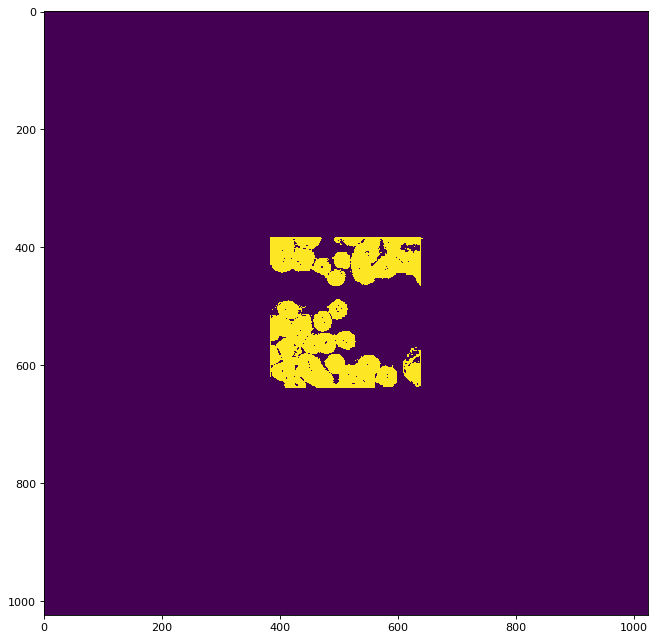

In [49]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(y[:,:,0])
plt.show()